In [1]:
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib notebook
# make 3D plot interactive (https://matplotlib.org/stable/users/explain/figure/interactive.html)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # plot in 3D (https://matplotlib.org/stable/users/explain/toolkits/mplot3d.html)
plt.rcParams['text.usetex'] = True

In [46]:
# Constants
Rcloud = 0.001*3.086e+16  # [Rcloud]=[m]
Mcloud = 2e+30  # [Mcloud]=[kg] take approx (https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html)
sigma = 6.65e-29  # [sigma]=[m^2] Thomson scattering cross section (https://physics.nist.gov/cgi-bin/cuu/Value?sigmae)
c = 3e8  # [c]=[m/s]

# Calculating mean free path
rho = Mcloud/((4/3)*np.pi*Rcloud**3)  # assuming uniform density
ne = rho/(1.67e-27)  # number density of electrons, using ionized Hydrogen (1 e 1 p, scatter only on e), divide by mass of proton because of mass dominant by proton, but electrically neutral ionized gas gives 1p1e, so same number density
mfp = 1/(ne*sigma)  # mean free path

N = 1000  # Number of photons to simulate (change N to give the corresponding # of light rays overlaid on 3D plot)

<IPython.core.display.Javascript object>


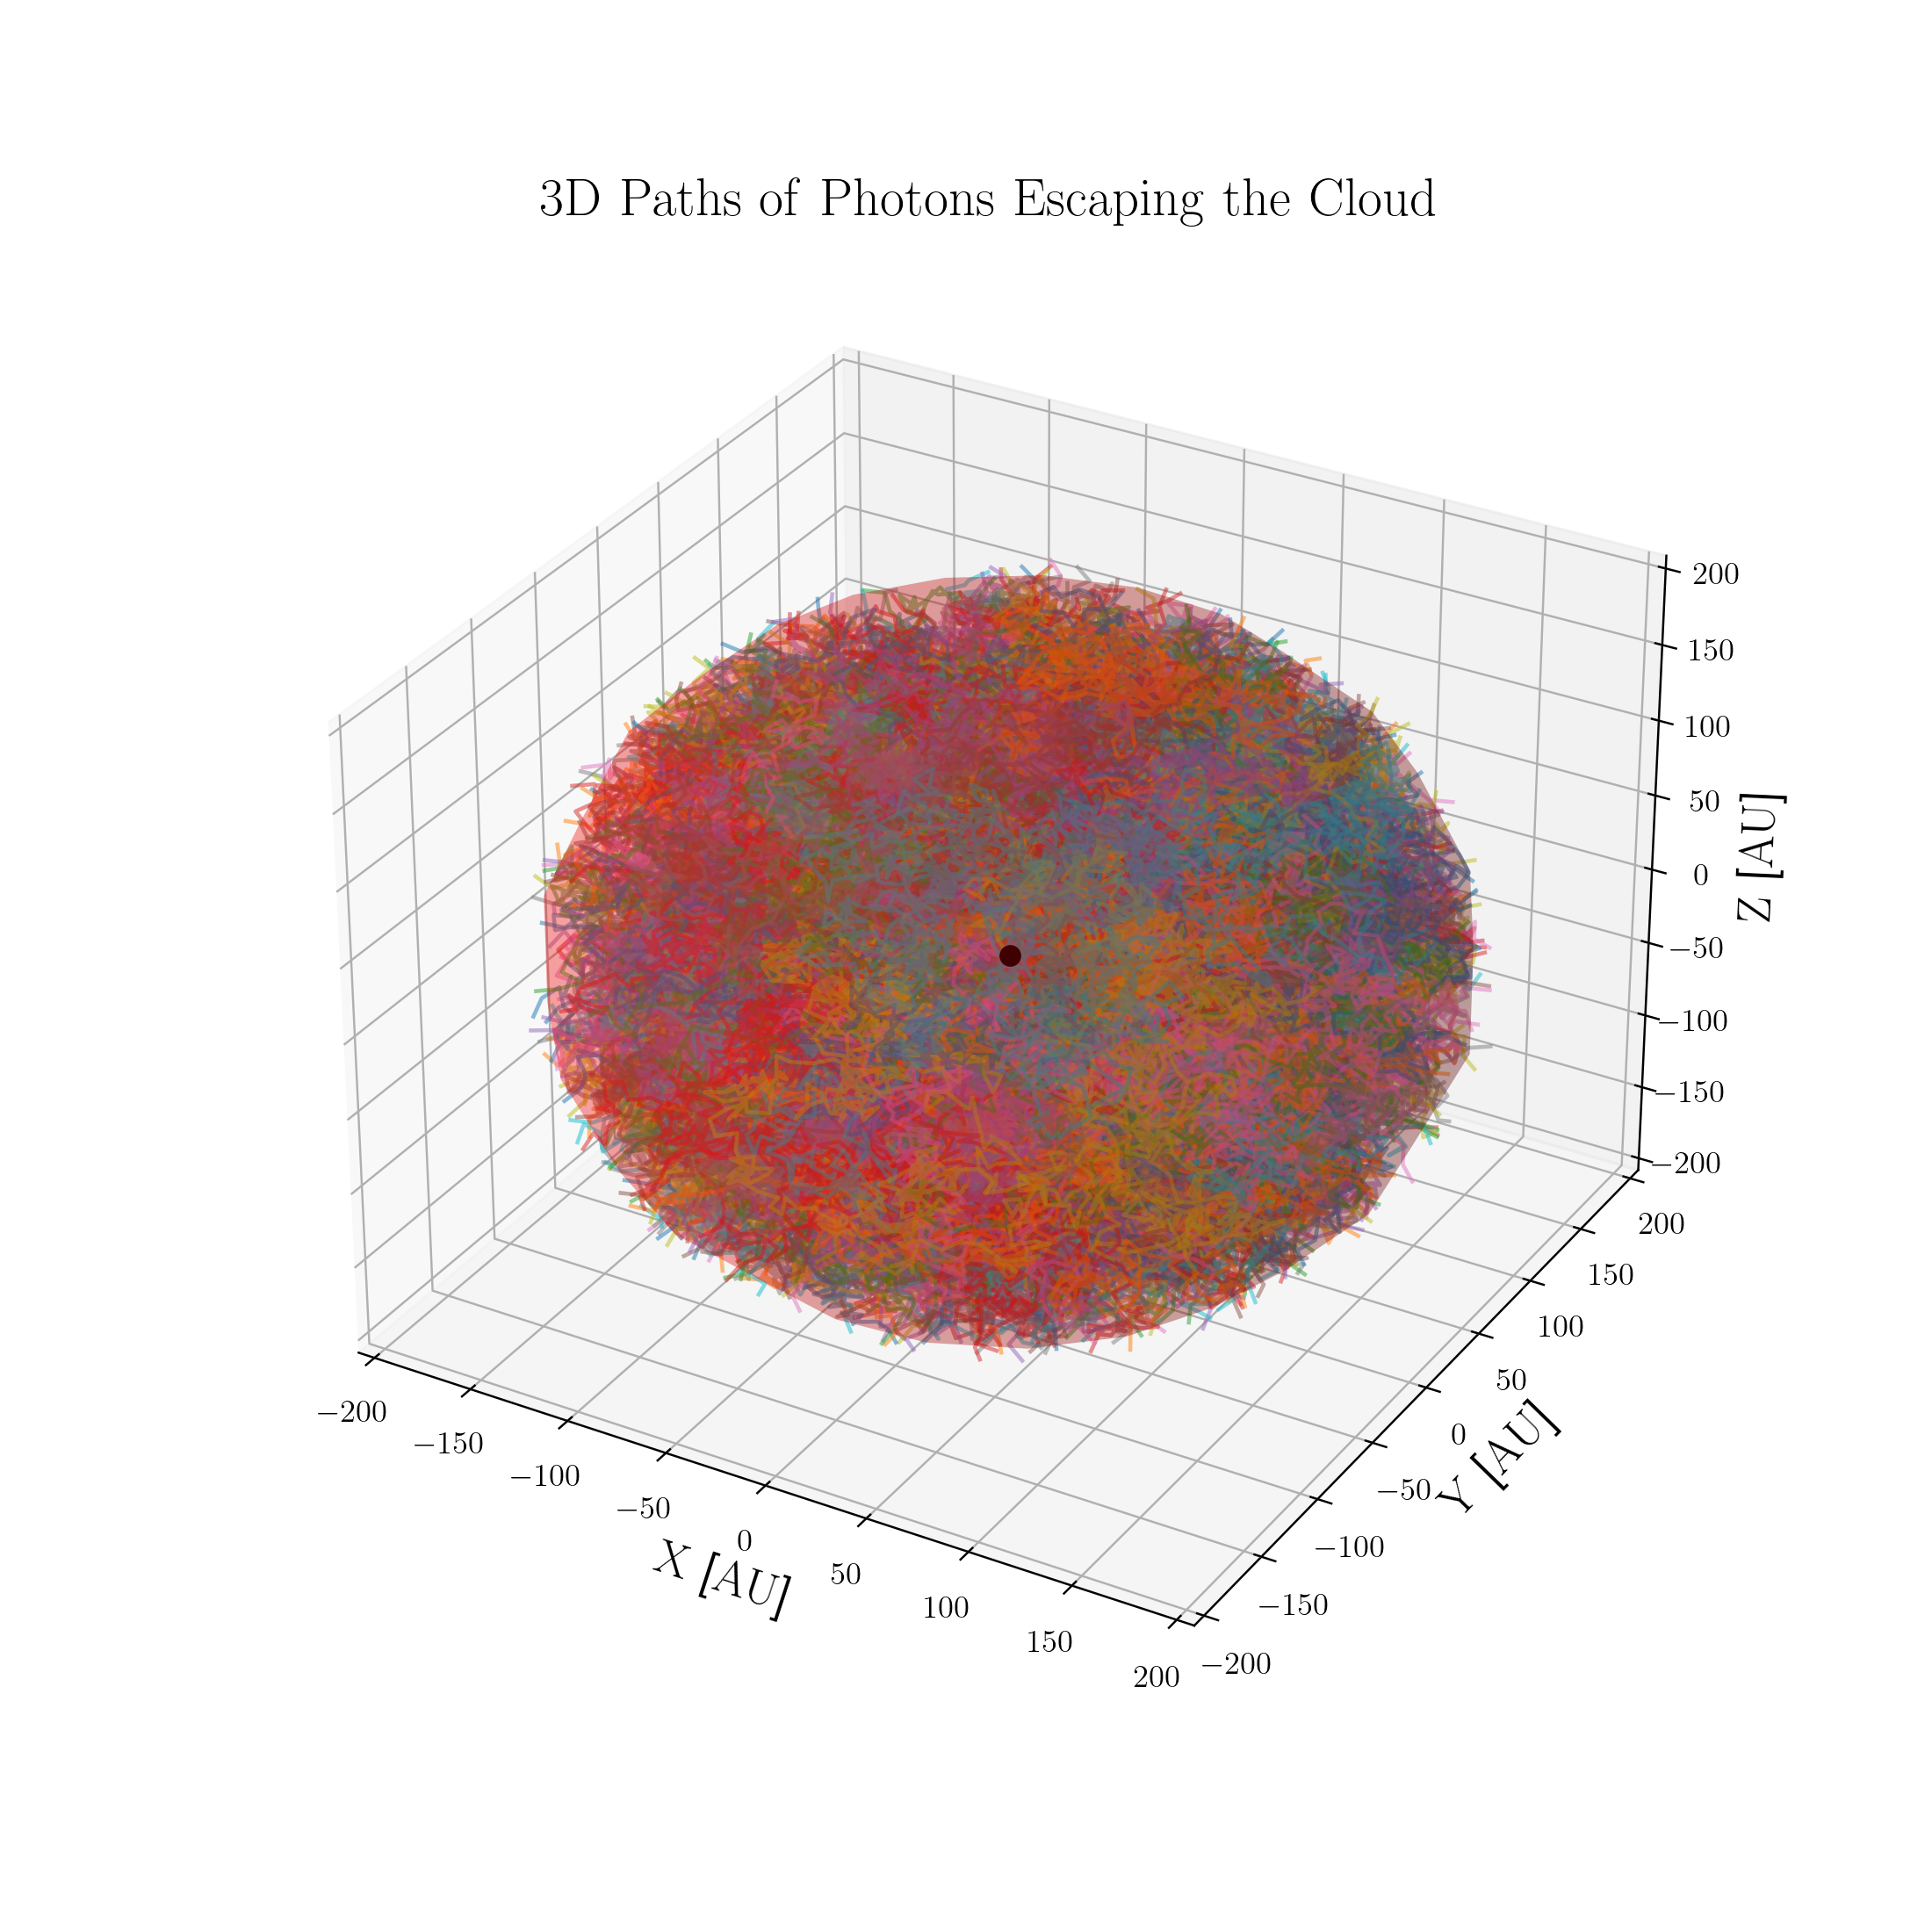

In [47]:
# Initialize arrays
tpd = []  # total path distances
ltt = []  # light travel times
rp = []  # radial positions
lsp = []  # last scattering positions

# 3D Visualization setup
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Simulate random walk for each photon
for _ in range(N):
    position = np.array([0.0, 0.0, 0.0])  # photon starting position
    total_distance = 0  # initialize total distance by photon at start to zero
    path = [position.copy()]  # list to store the positions at each step
    while np.linalg.norm(position) < Rcloud:  # np.linalg.norm gives the length of a vector (https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)
        theta = np.arccos(2*np.random.rand()-1)  # theta cannot be random otherwise will focus on the pole (https://corysimon.github.io/articles/uniformdistn-on-sphere/)
        phi = 2*np.pi*np.random.rand()  # phi can be random when scaled by 2pi (https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)
        direction = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])  # where it will go next in terms of x,y,z
        position += direction*mfp  # update photon's position
        path.append(position.copy())  # append new position to path list
        total_distance += mfp  # update total distance traveled
        rp.append(np.linalg.norm(position))  # record radial position for intensity distribution analysis
        if np.linalg.norm(position) >= Rcloud:  # truncate when light ray leaves cloud surface
                lsp.append(np.linalg.norm(position))  # put the lsp at the last position
                break
    tpd.append(total_distance)  # record tpd after photon escapes
    ltt.append(total_distance/c)  # record ltt based on total distance
    path = np.array(path)
    ax.plot(path[:,0]/1.5e11, path[:,1]/1.5e11, path[:,2]/1.5e11, alpha=0.5)  # plotting the x,y,z coordinates of every single path

# 3D plot
# Parameters for the spherical cloud  (plot out cloud to see whether the ray gets out when it's only one ray)
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]  # Spherical coordinate meshgrid (https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html)
x_sphere = Rcloud/1.5e11*np.cos(u)*np.sin(v)
y_sphere = Rcloud/1.5e11*np.sin(u)*np.sin(v)
z_sphere = Rcloud/1.5e11*np.cos(v)
# Plotting the spherical cloud as a transparent surface to indicate the edge of cloud
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.2)  # small alpha value makes it transparent so can see the rays within
# Setting the aspect ratio for the axes
ax.set_aspect('auto')

ax.scatter(0, 0, 0, color='k', s=50)  # 's' controls the size of the dot

ax.set_title(r'$\rm{3D\,\,Paths\,\,of\,\,Photons\,\,Escaping\,\,the\,\,Cloud}$', size=20)
ax.set_xlabel(r'$\rm X$ [$\rm AU$]', size=18)
ax.set_ylabel(r'$\rm Y$ [$\rm AU$]', size=18)
ax.set_zlabel(r'$\rm Z$ [$\rm AU$]', size=18)
ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-200,200)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)
plt.show()

<IPython.core.display.Javascript object>


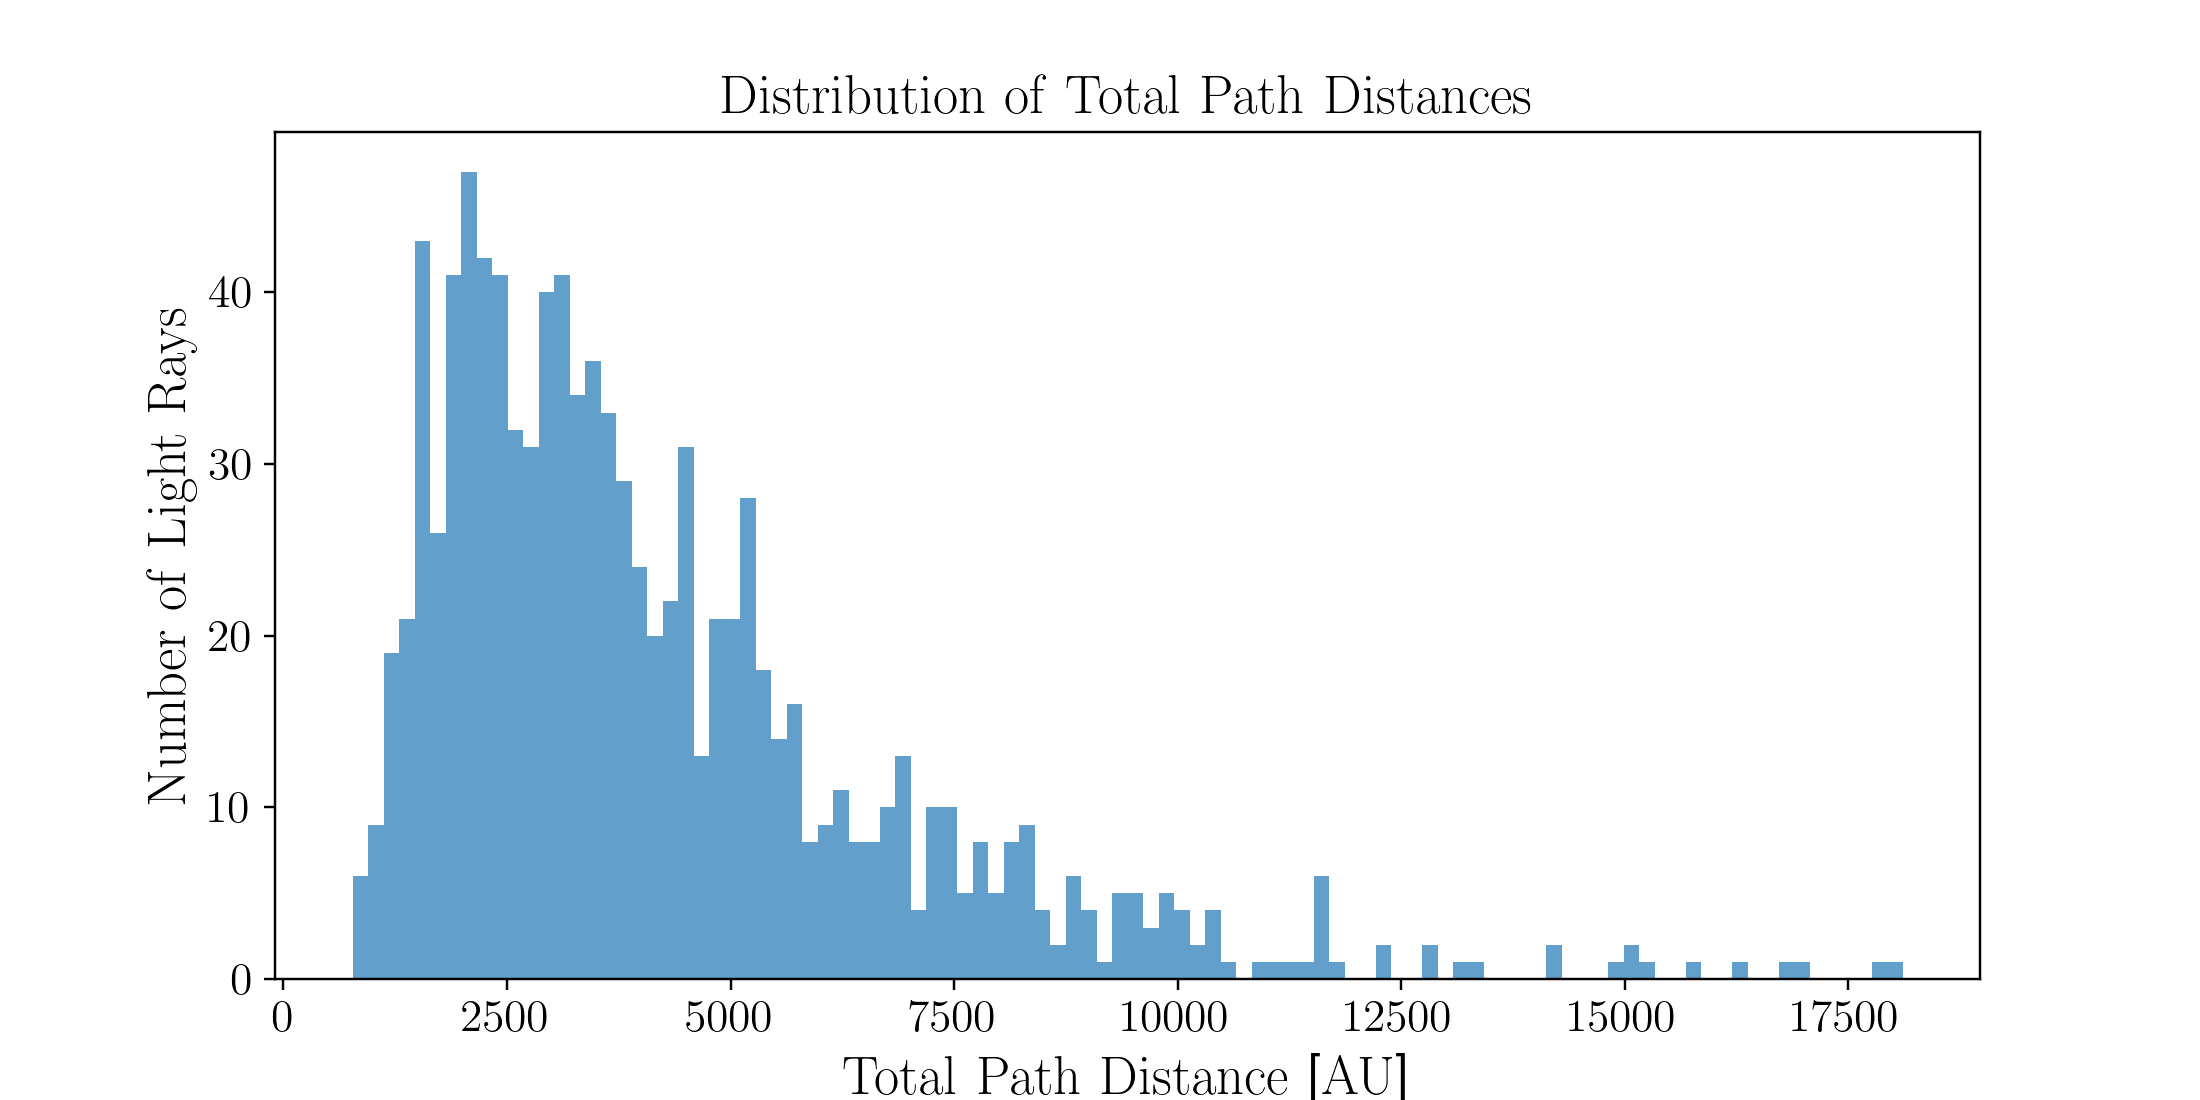

<IPython.core.display.Javascript object>


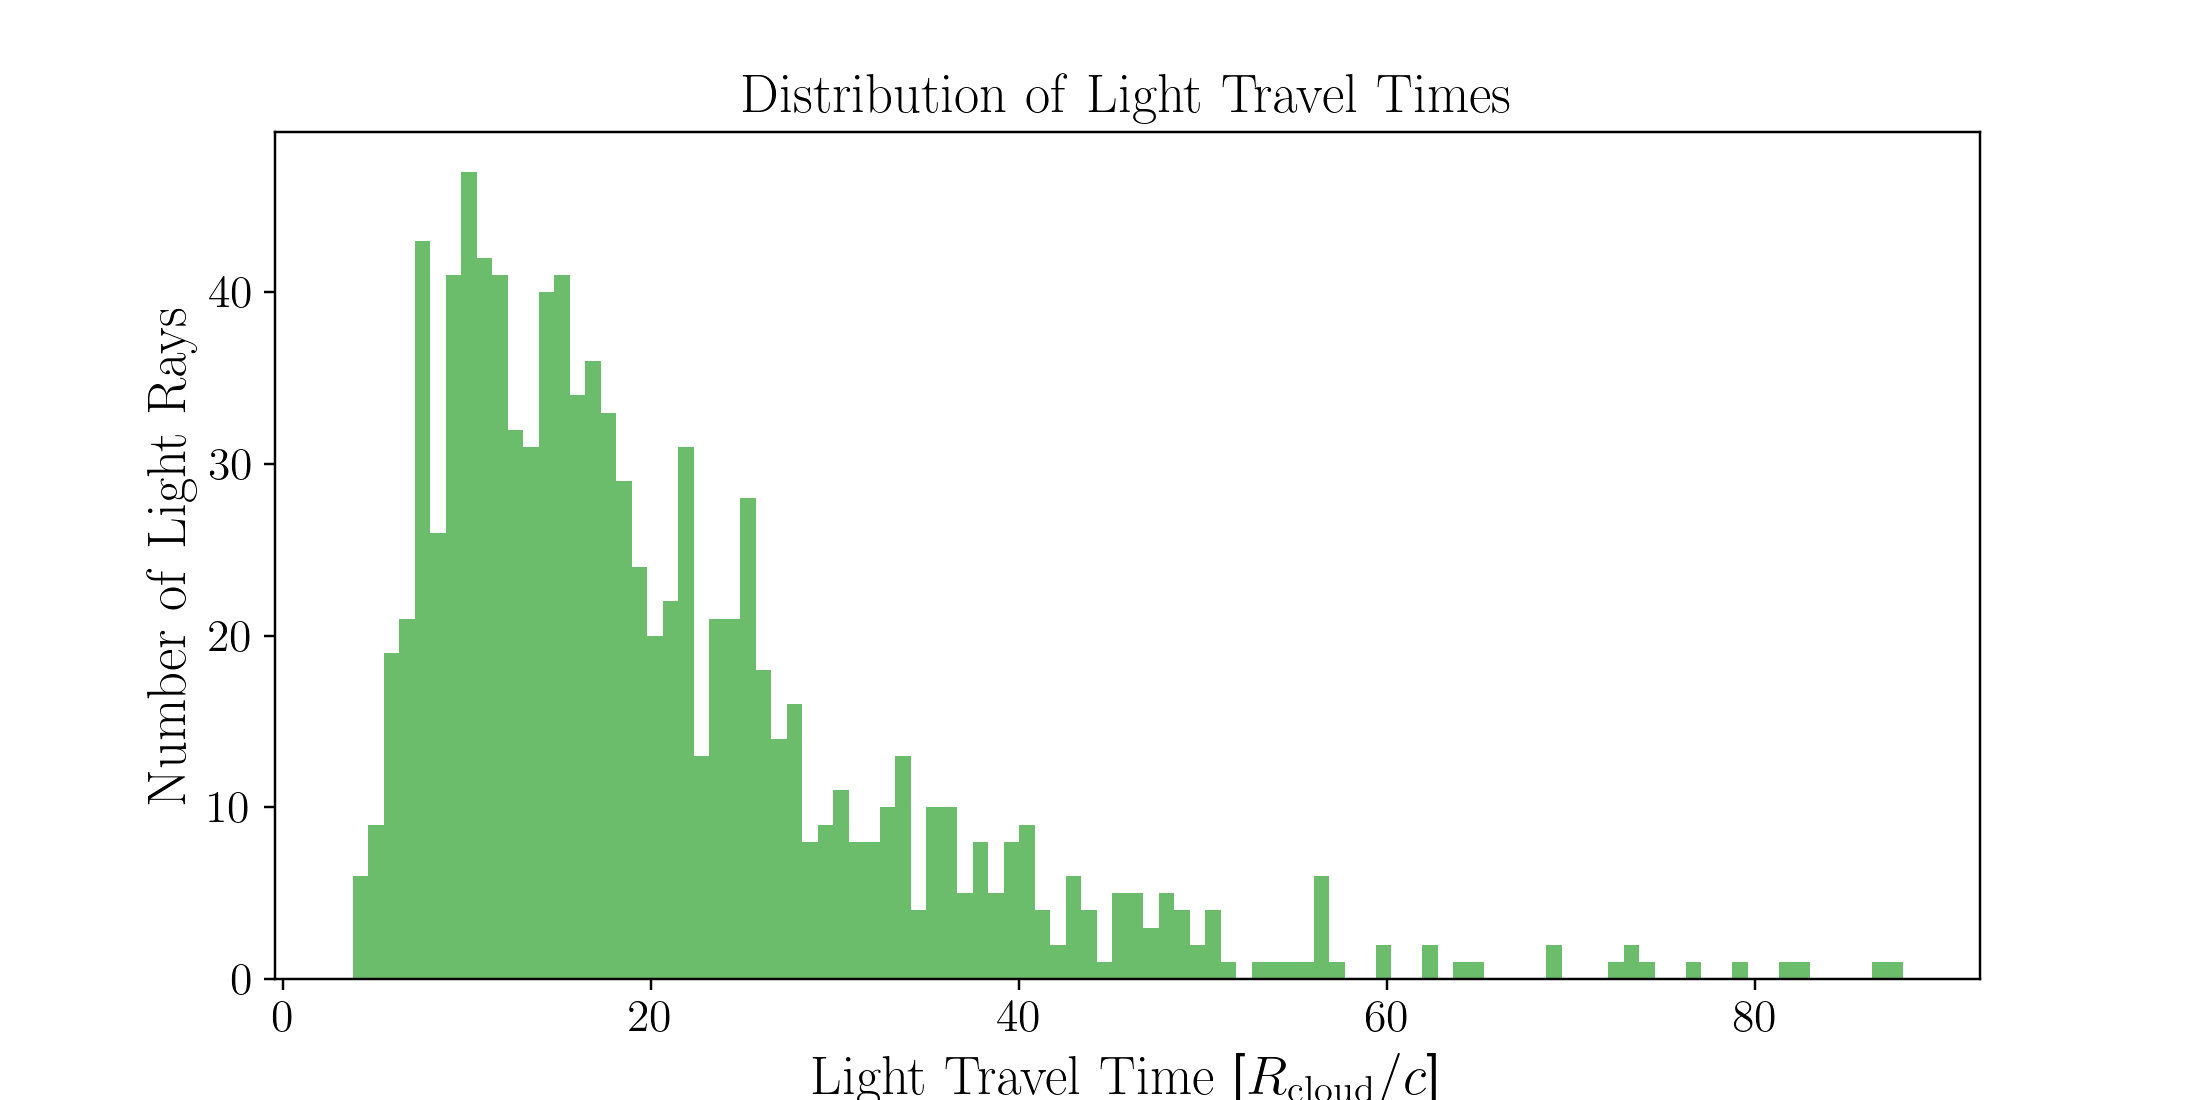

In [51]:
plt.figure(figsize=(10,5))
plt.hist(np.array(tpd)/1.5e11, bins=100, color='tab:blue', alpha=0.7)  # scale the total path distance by 1AU
plt.title(r'$\rm Distribution\,\,of\,\,Total\,\,Path\,\,Distances$', size=18)
plt.xlabel(r'$\rm Total\,\,Path\,\,Distance$ [$\rm AU$]', size=18)
plt.ylabel(r'$\rm Number\,\,of\,\,Light\,\,Rays$', size=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(np.array(ltt)/(Rcloud/c), bins=100, color='tab:green', alpha=0.7)  # scale the light travel time by half-light-crossing time of the cloud
plt.title(r'$\rm Distribution\,\,of\,\,Light\,\,Travel\,\,Times$', size=18)
plt.xlabel(r'$\rm Light\,\,Travel\,\,Time$ [$R_{\rm cloud}/c$]', size=18)
plt.ylabel(r'$\rm Number\,\,of\,\,Light\,\,Rays$', size=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Q3 discussion of total path distance and/or light travel times
Total path distances is simply light travel time multiplied by speed of light.  Given tha nature of random walks, the distribution could resemble an exponential decay for the number of photons escaping as a function of path length.  This is because the probability of a photon escaping the cloud without scattering decreases exponentially with distance, the distribution has long tail, with most photons having relatively short total traveling times and a smaller number has much longer travel times.  Both distributions peak at a certain distance (and its corresponding time), while it drops off exponentially to the long distribution tail.  The peak should in principle not coincide with the random-walk $\sqrt{N}$ because it's a skewed distribution, the expectation value of total path distance should not coincide with the peak.  The mean free path is $\lambda\approx 10.3\,{\rm AU}$, the total displacement out is $R_{\rm cloud}$, the rms distance of the random walk gives $$R_{\rm cloud} = \sqrt{N}\lambda\,\,\rightarrow\,\,N\approx 400\,{\rm steps}~.$$  Each step is has an average length of $\lambda$, so the total path distance should be around $$\sqrt{\langle L^2\rangle}=N\cdot\lambda = 4120\,{\rm AU}~.$$

<IPython.core.display.Javascript object>


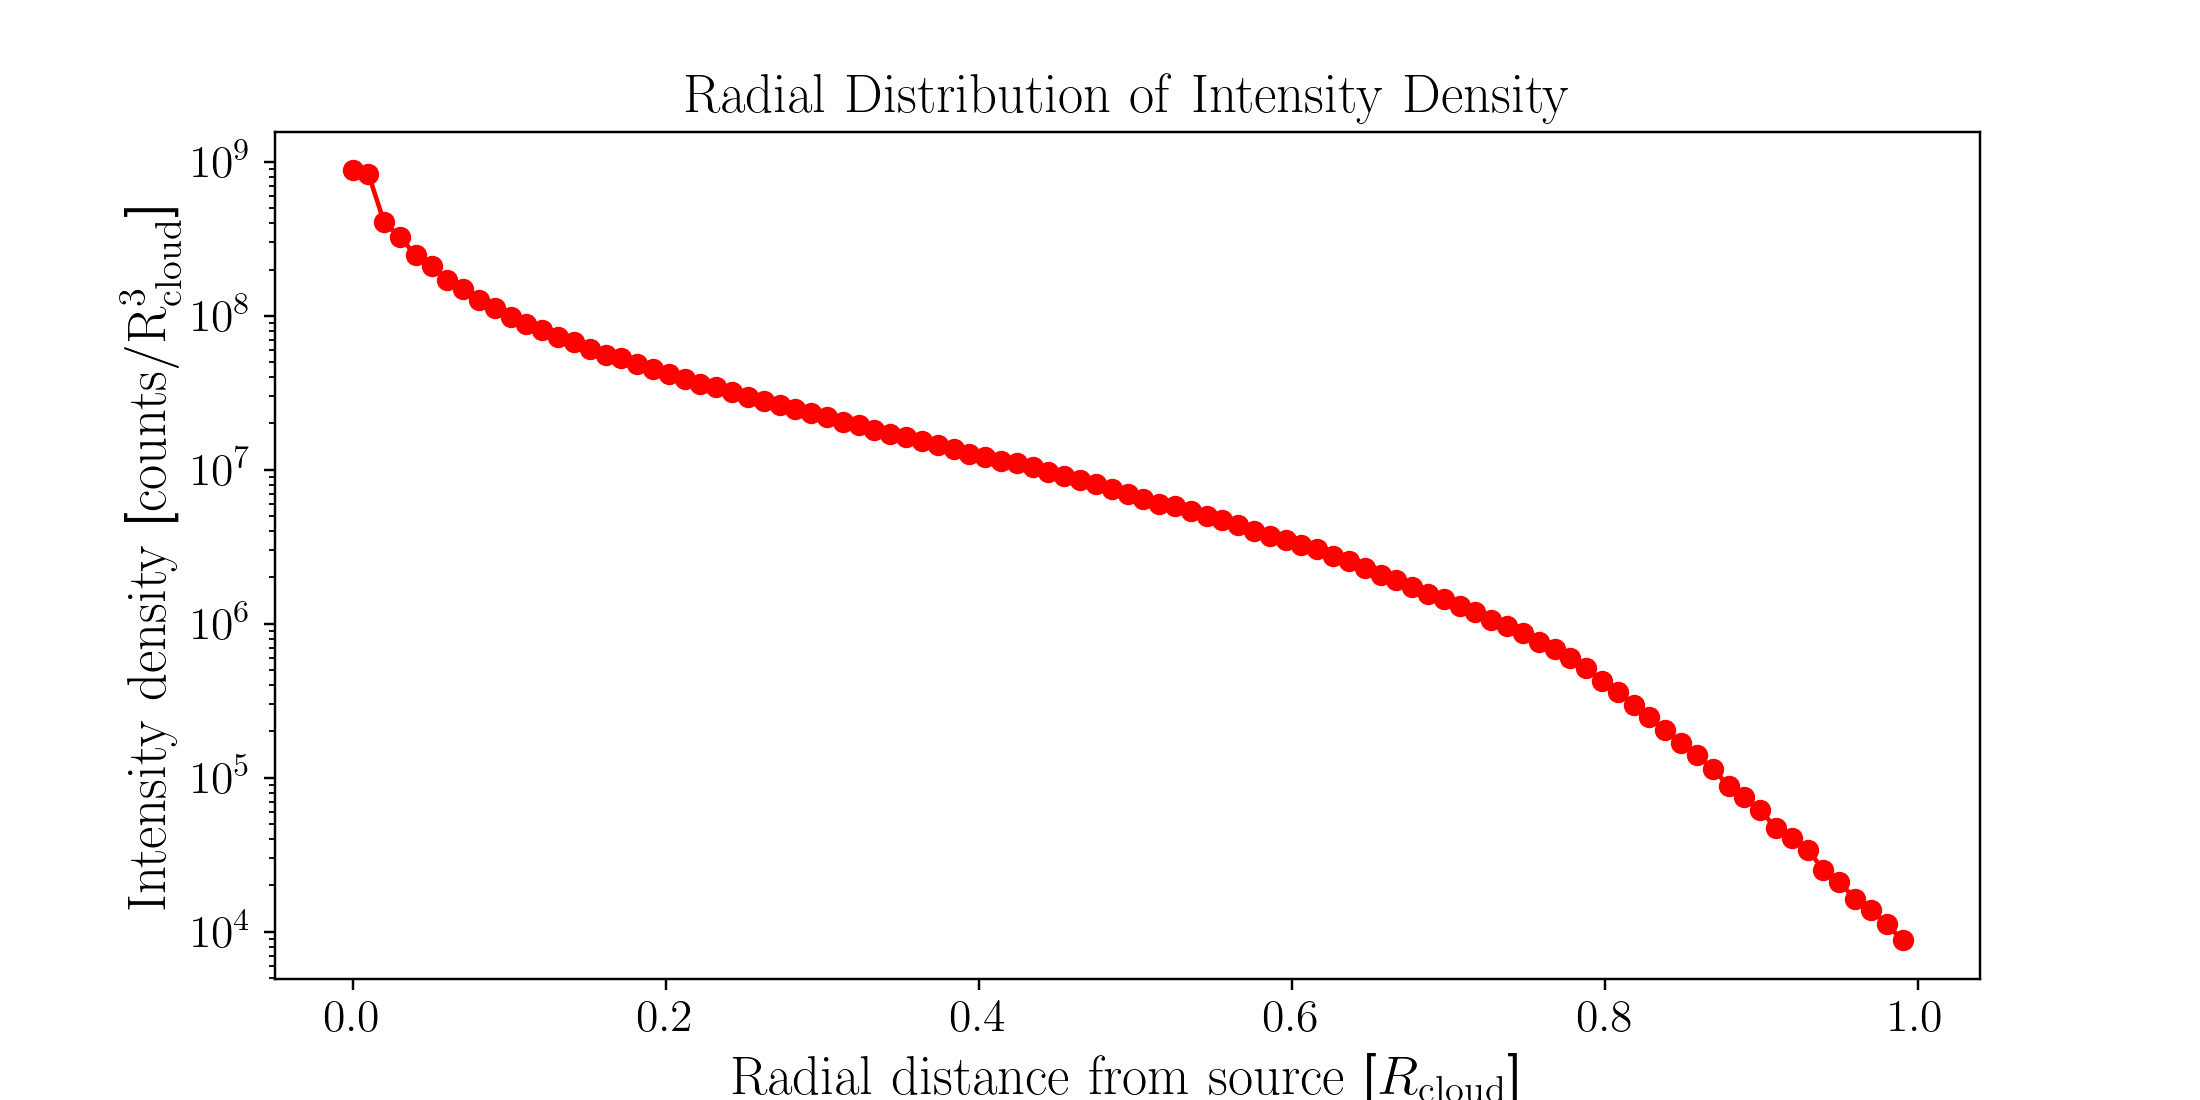

In [78]:
# Pick only one of the rays trajectory out
radial_bins = np.linspace(0,Rcloud,100)  # Number of radial shells & define the edges of the shells
radial_midpoints = (radial_bins[:-1] + radial_bins[1:])/2  # Calculate midpoints for plotting
counts, _ = np.histogram(np.array(rp), bins=radial_bins)  # (https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)
shells = (4/3)*np.pi*(radial_bins[1:]**3-radial_bins[:-1]**3)  # Calculate the volume of each shell by taking the difference between two consecutive volumes
#intensity_density = counts/shells
intensity_density = counts/(4*np.pi*(radial_midpoints/Rcloud)**2*(1/1000))  # scale radius by Rcloud because so I don't have to use sum up all rays and still get a sensible number 

plt.figure(figsize=(10,5))
#plt.plot(radial_midpoints/Rcloud, intensity_density/(Rcloud/1000), marker='o', linestyle='-', color='red')
plt.plot(radial_bins[:-1]/Rcloud, intensity_density, marker='o', linestyle='-', color='red')

plt.title(r'$\rm Radial\,\,Distribution\,\,of\,\,Intensity\,\,Density$', size=18)
plt.xlabel(r'$\rm Radial\,\,distance\,\,from\,\,source$ [$R_{\rm cloud}$]', size=18)
plt.ylabel(r'$\rm Intensity\,\,density$ [$\rm counts/R_{\rm cloud}^3$]', size=18)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Q3 discussion of radial distribution of intensity density
The intensity density drops mostly monotonically because the number density of steps is becoming more diffused when it gets out since we are dividing by a larger volume.  The sudden peak comes from the random nature of just one ray.

<IPython.core.display.Javascript object>


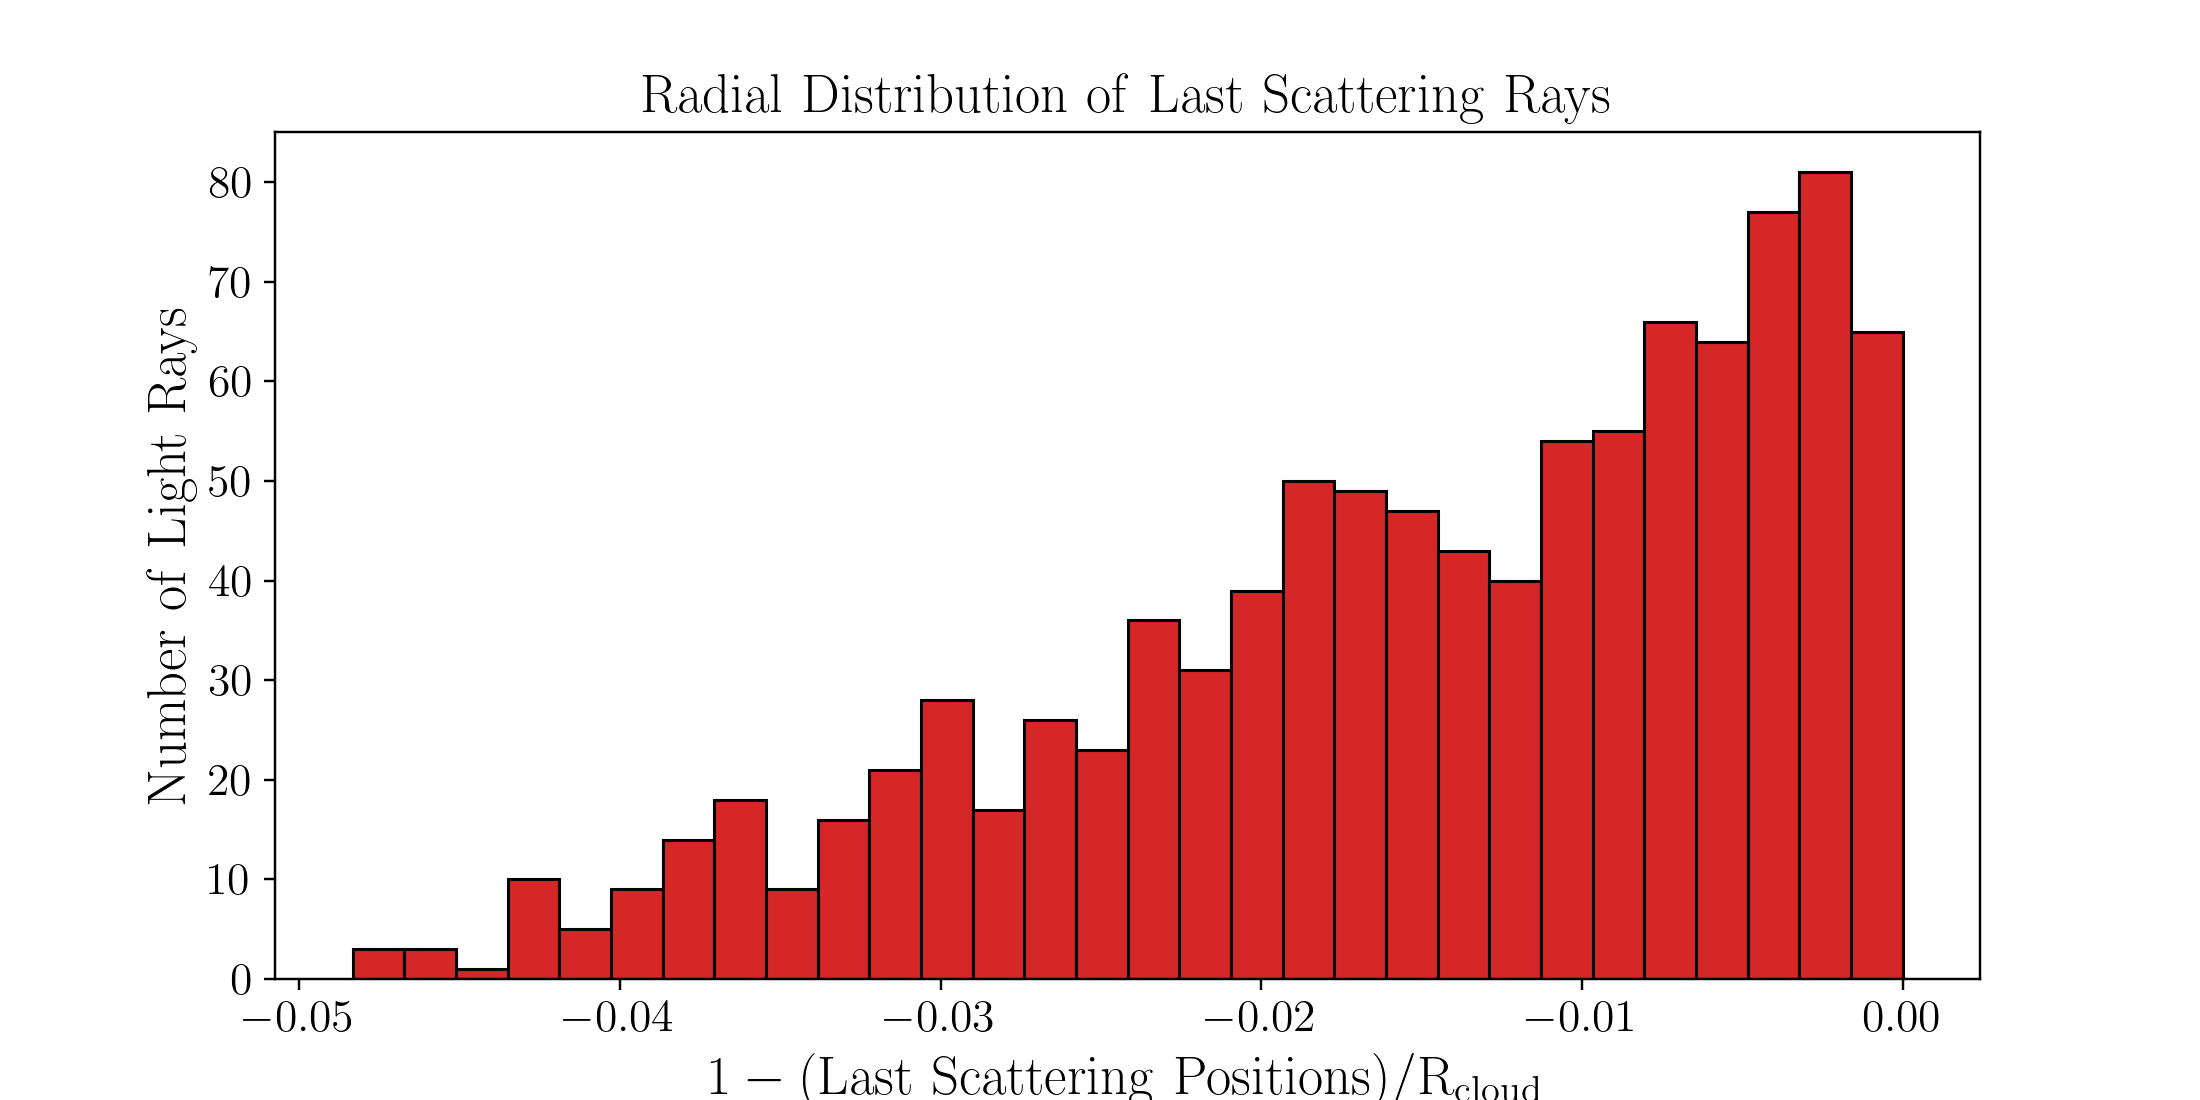

In [72]:
plt.figure(figsize=(10,5))
plt.hist((Rcloud-np.array(lsp))/Rcloud, bins=30, color='tab:red', edgecolor='black')  # rescaling the values to determine how close it is to the edge of the cloud
plt.title(r'$\rm Radial\,\,Distribution\,\,of\,\,Last\,\,Scattering\,\,Rays$', size=18)
plt.xlabel(r'$1-(\rm Last\,\,Scattering\,\,Positions)/R_{\rm cloud}$', size=18)
plt.ylabel(r'$\rm Number\,\,of\,\,Light\,\,Rays$', size=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Q3 discussion of radial distribution of last scattering position
Most rays scattered near the surface of the cloud given by the distribution having mostly an increasing trend towards the edge of the cloud, which seems intuitive as there are still some ionized hydrogen near the edge to be scattered onto.  

In [8]:
################ Using rho(r) = rho0(1-(r/Rcloud) ###################

Find central density by integrating: $$M_{\rm cloud}=4\pi\int^{R_{\rm cloud}}_0\rho(r)r^2dr = 4\pi\rho_0\int^{R_{\rm cloud}}_0\left(1-\frac{r^2}{R_{\rm cloud}^2}\right)r^2dr = 4\pi\rho_0\left(\frac{R_{\rm cloud}^3}{3} - \frac{R_{\rm cloud}^3}{5}\right)\,\,\Rightarrow\,\,\rho_0=4.06\times10^{-11}\,{\rm kg/m}^3$$

<IPython.core.display.Javascript object>


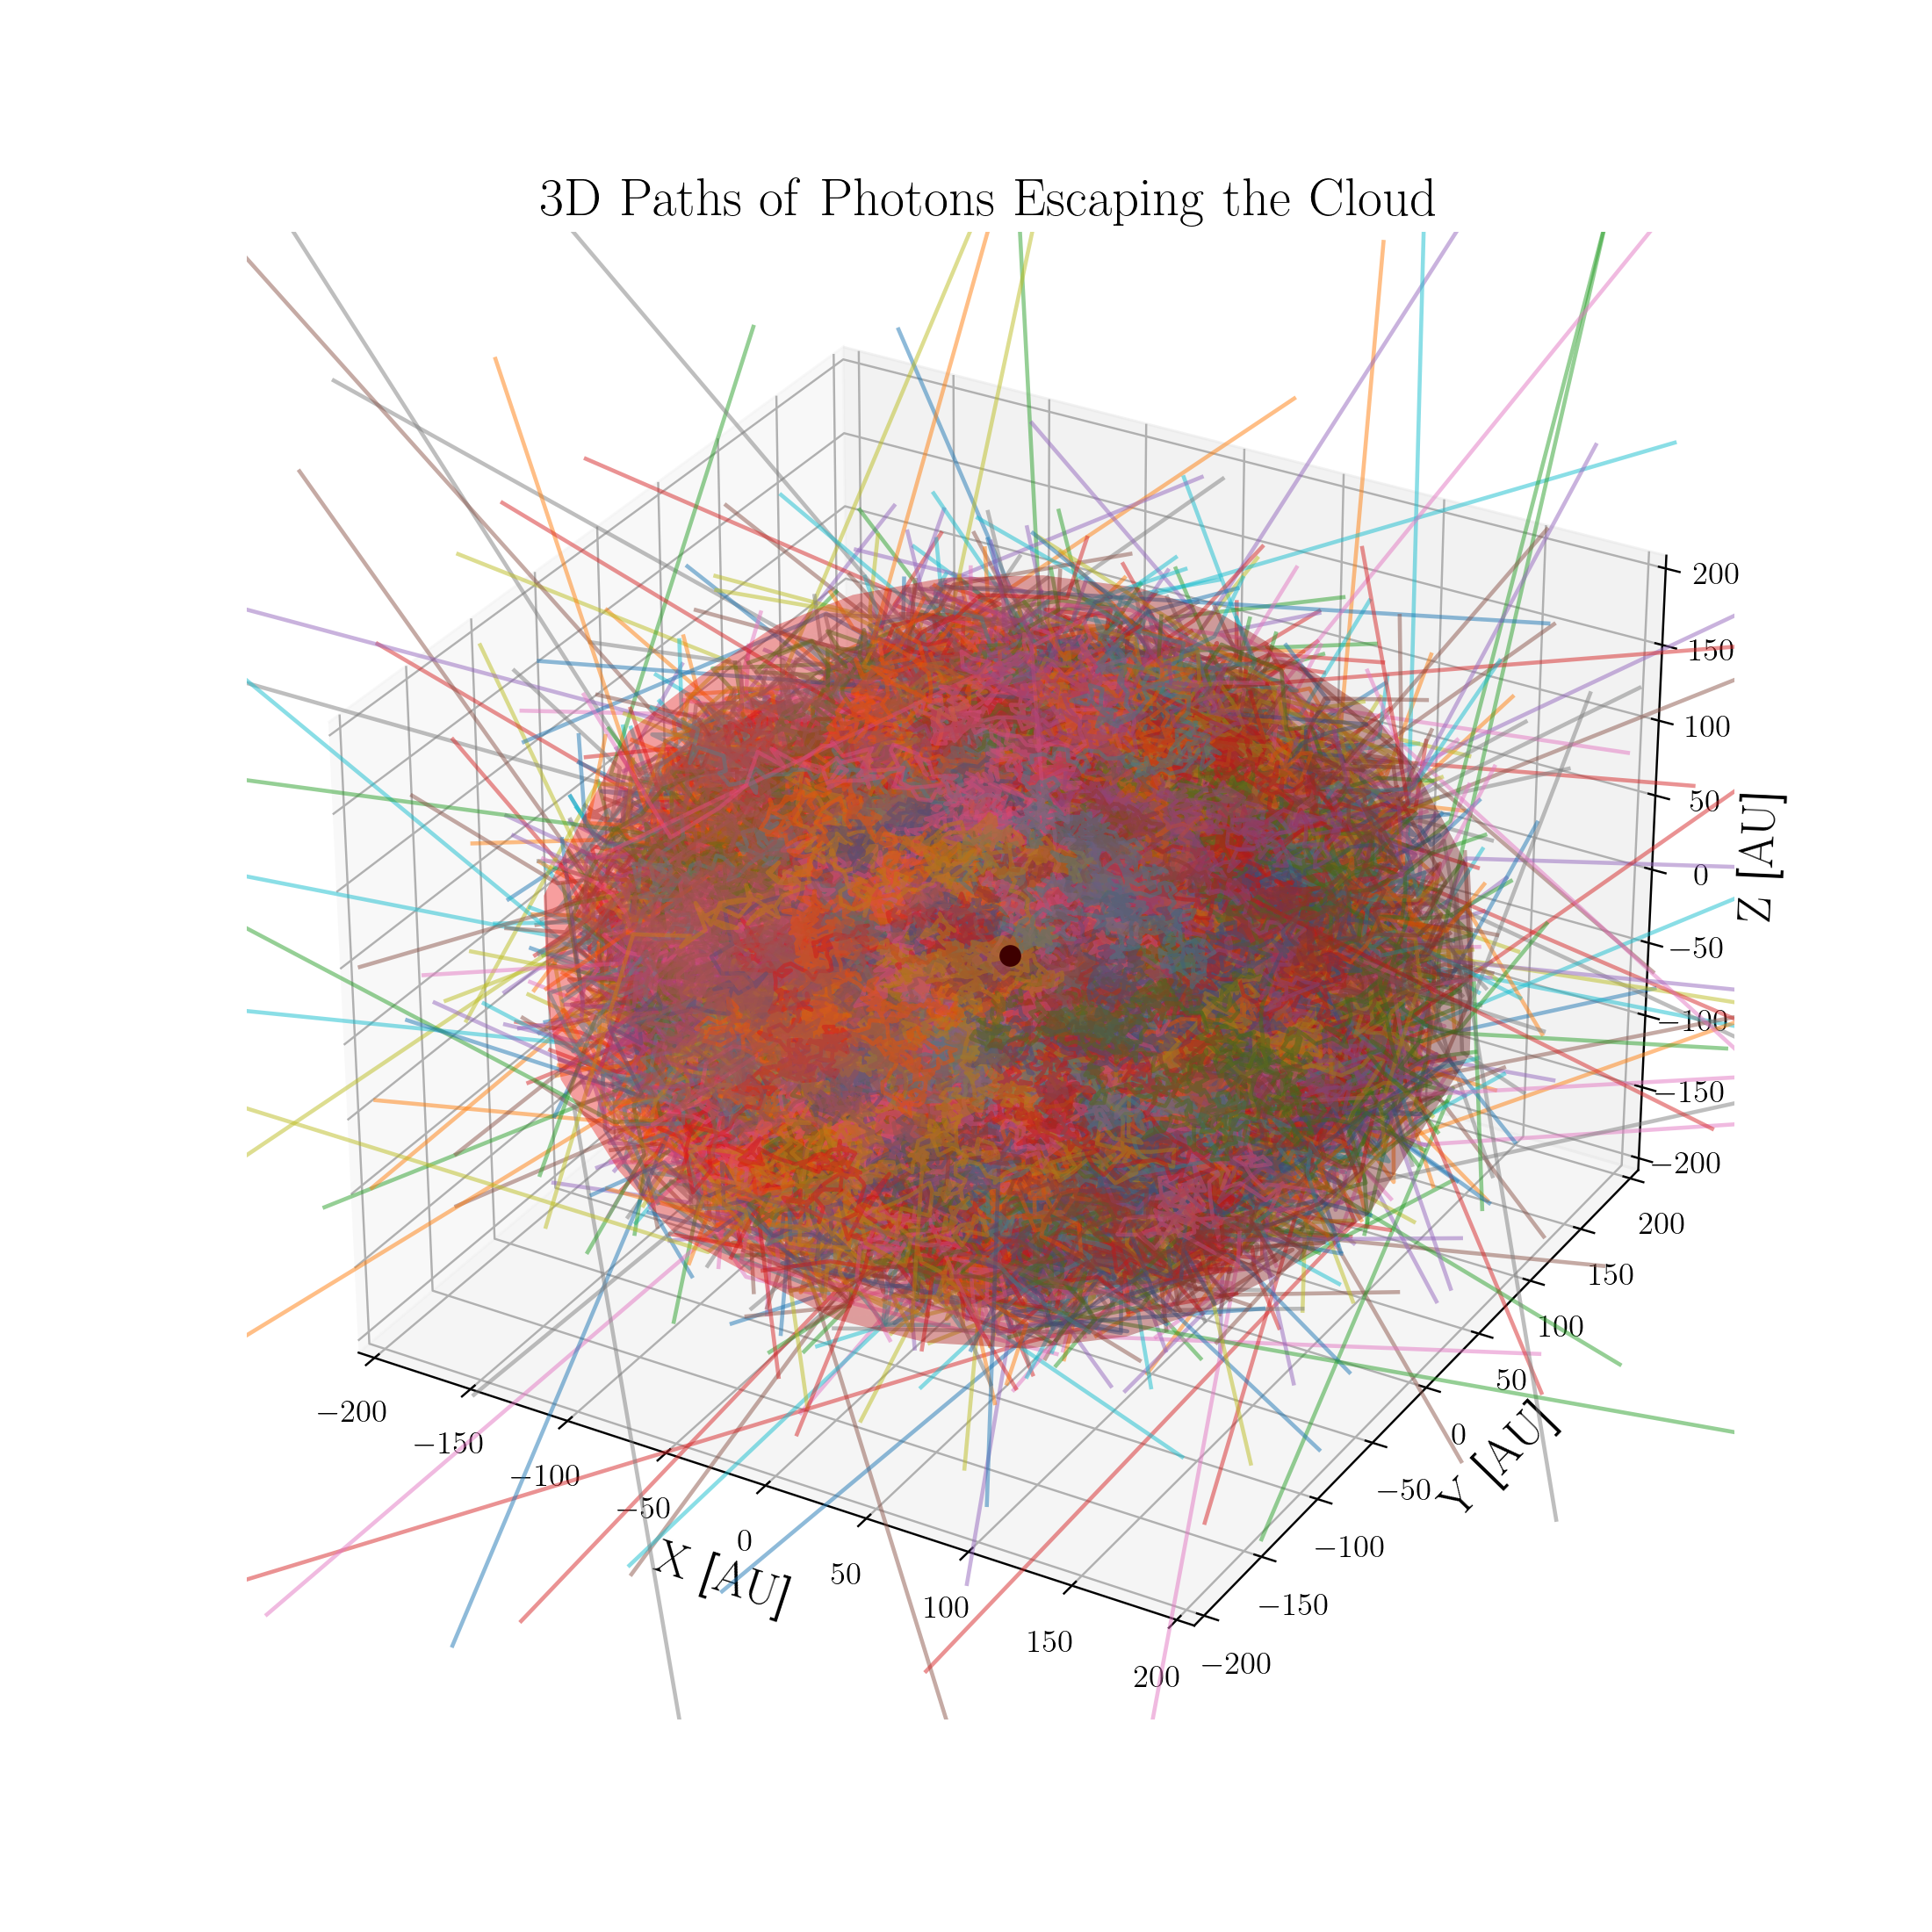

In [73]:
# Initialize arrays
tpd = []  # total path distances
ltt = []  # light travel times
rp = []  # radial positions
lsp = []  # last scattering positions

# 3D Visualization setup
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

def rho_new(r):
    return 4.06e-11*(1-(r/Rcloud)**2)

# Simulate random walk for each photon
for _ in range(N):
    position = np.array([0.0, 0.0, 0.0])  # photon starting position
    total_distance = 0  # initialize total distance by photon at start to zero
    path = [position.copy()]  # list to store the positions at each step
    while np.linalg.norm(position) < Rcloud:  # np.linalg.norm gives the length of a vector (https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)
        localrho = rho_new(np.linalg.norm(position))  # update local density given by where the ray currently is
        mfp = 1.67e-27/(localrho*sigma)  # mean free path is defined by the local density
        theta = np.arccos(2*np.random.rand()-1)  # theta cannot be random otherwise will focus on the pole (https://corysimon.github.io/articles/uniformdistn-on-sphere/)
        phi = 2*np.pi*np.random.rand()  # phi can be random when scaled by 2pi (https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)
        direction = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])  # where it will go next in terms of x,y,z
        position += direction*mfp  # update photon's position
        path.append(position.copy())  # append new position to path list
        total_distance += mfp  # update total distance traveled
        rp.append(np.linalg.norm(position))  # record radial position for intensity distribution analysis
        if np.linalg.norm(position) >= Rcloud:  # truncate when light ray leaves cloud surface
                lsp.append(np.linalg.norm(position))  # put the lsp at the last position
                break
    tpd.append(total_distance)  # record tpd after photon escapes
    ltt.append(total_distance/c)  # record ltt based on total distance
    path = np.array(path)
    ax.plot(path[:,0]/1.5e11, path[:,1]/1.5e11, path[:,2]/1.5e11, alpha=0.5)  # plotting the x,y,z coordinates of every single path

# 3D plot
# Parameters for the spherical cloud
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]  # Spherical coordinate meshgrid (https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html)
x_sphere = Rcloud/1.5e11*np.cos(u)*np.sin(v)
y_sphere = Rcloud/1.5e11*np.sin(u)*np.sin(v)
z_sphere = Rcloud/1.5e11*np.cos(v)
# Plotting the spherical cloud as a transparent surface to indicate the edge of cloud
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.2)  # small alpha value makes it transparent so can see the rays within
# Setting the aspect ratio for the axes
ax.set_aspect('auto')

ax.scatter(0, 0, 0, color='k', s=50)  # 's' controls the size of the dot

ax.set_title(r'$\rm{3D\,\,Paths\,\,of\,\,Photons\,\,Escaping\,\,the\,\,Cloud}$', size=20)
ax.set_xlabel(r'$\rm X$ [$\rm AU$]', size=18)
ax.set_ylabel(r'$\rm Y$ [$\rm AU$]', size=18)
ax.set_zlabel(r'$\rm Z$ [$\rm AU$]', size=18)
ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-200,200)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)
plt.show()

Larger mean free path when rays get to the outer region, the last scattering rays free stream looks like a "longer"  ray.

<IPython.core.display.Javascript object>


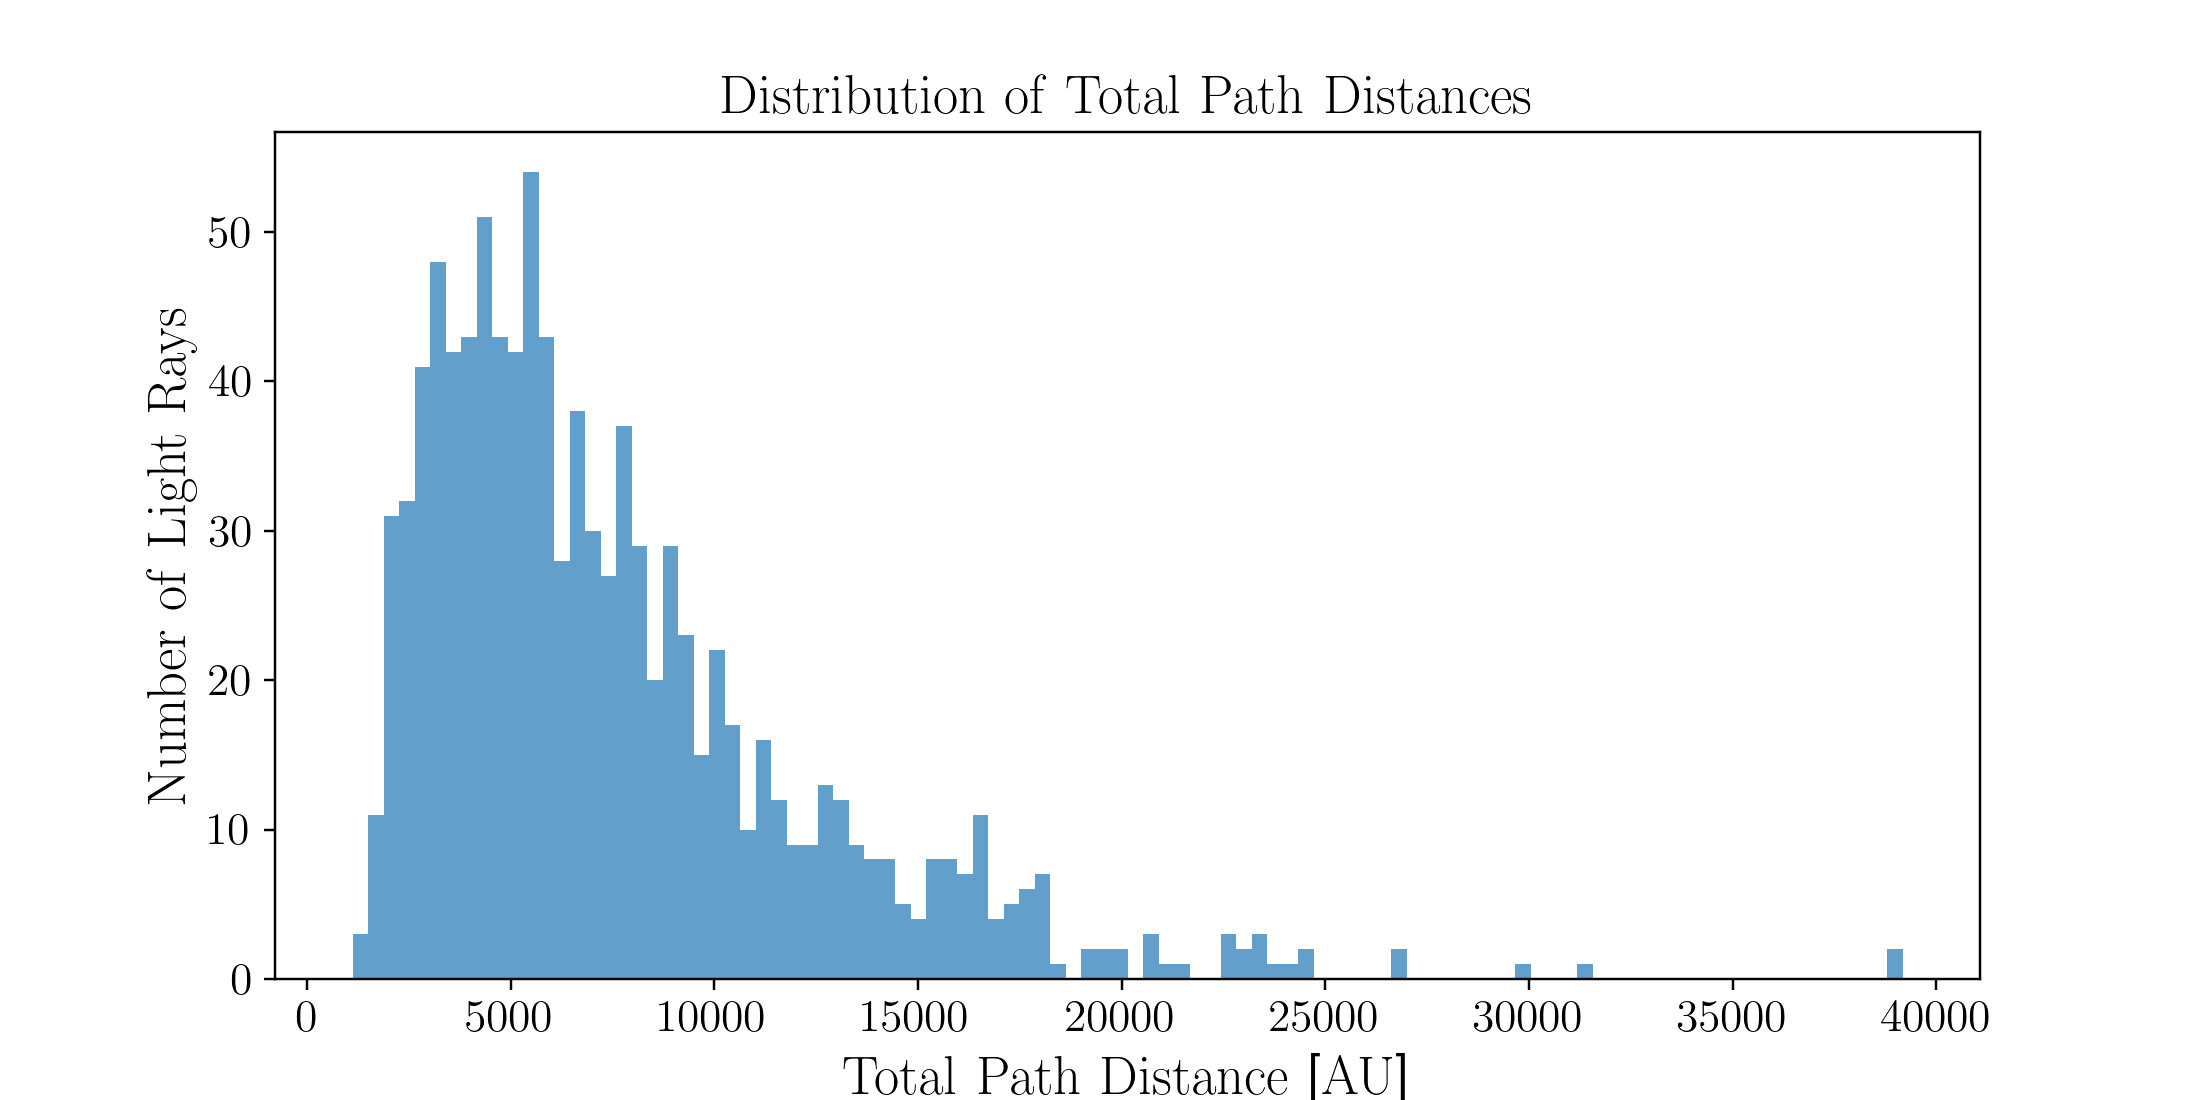

<IPython.core.display.Javascript object>


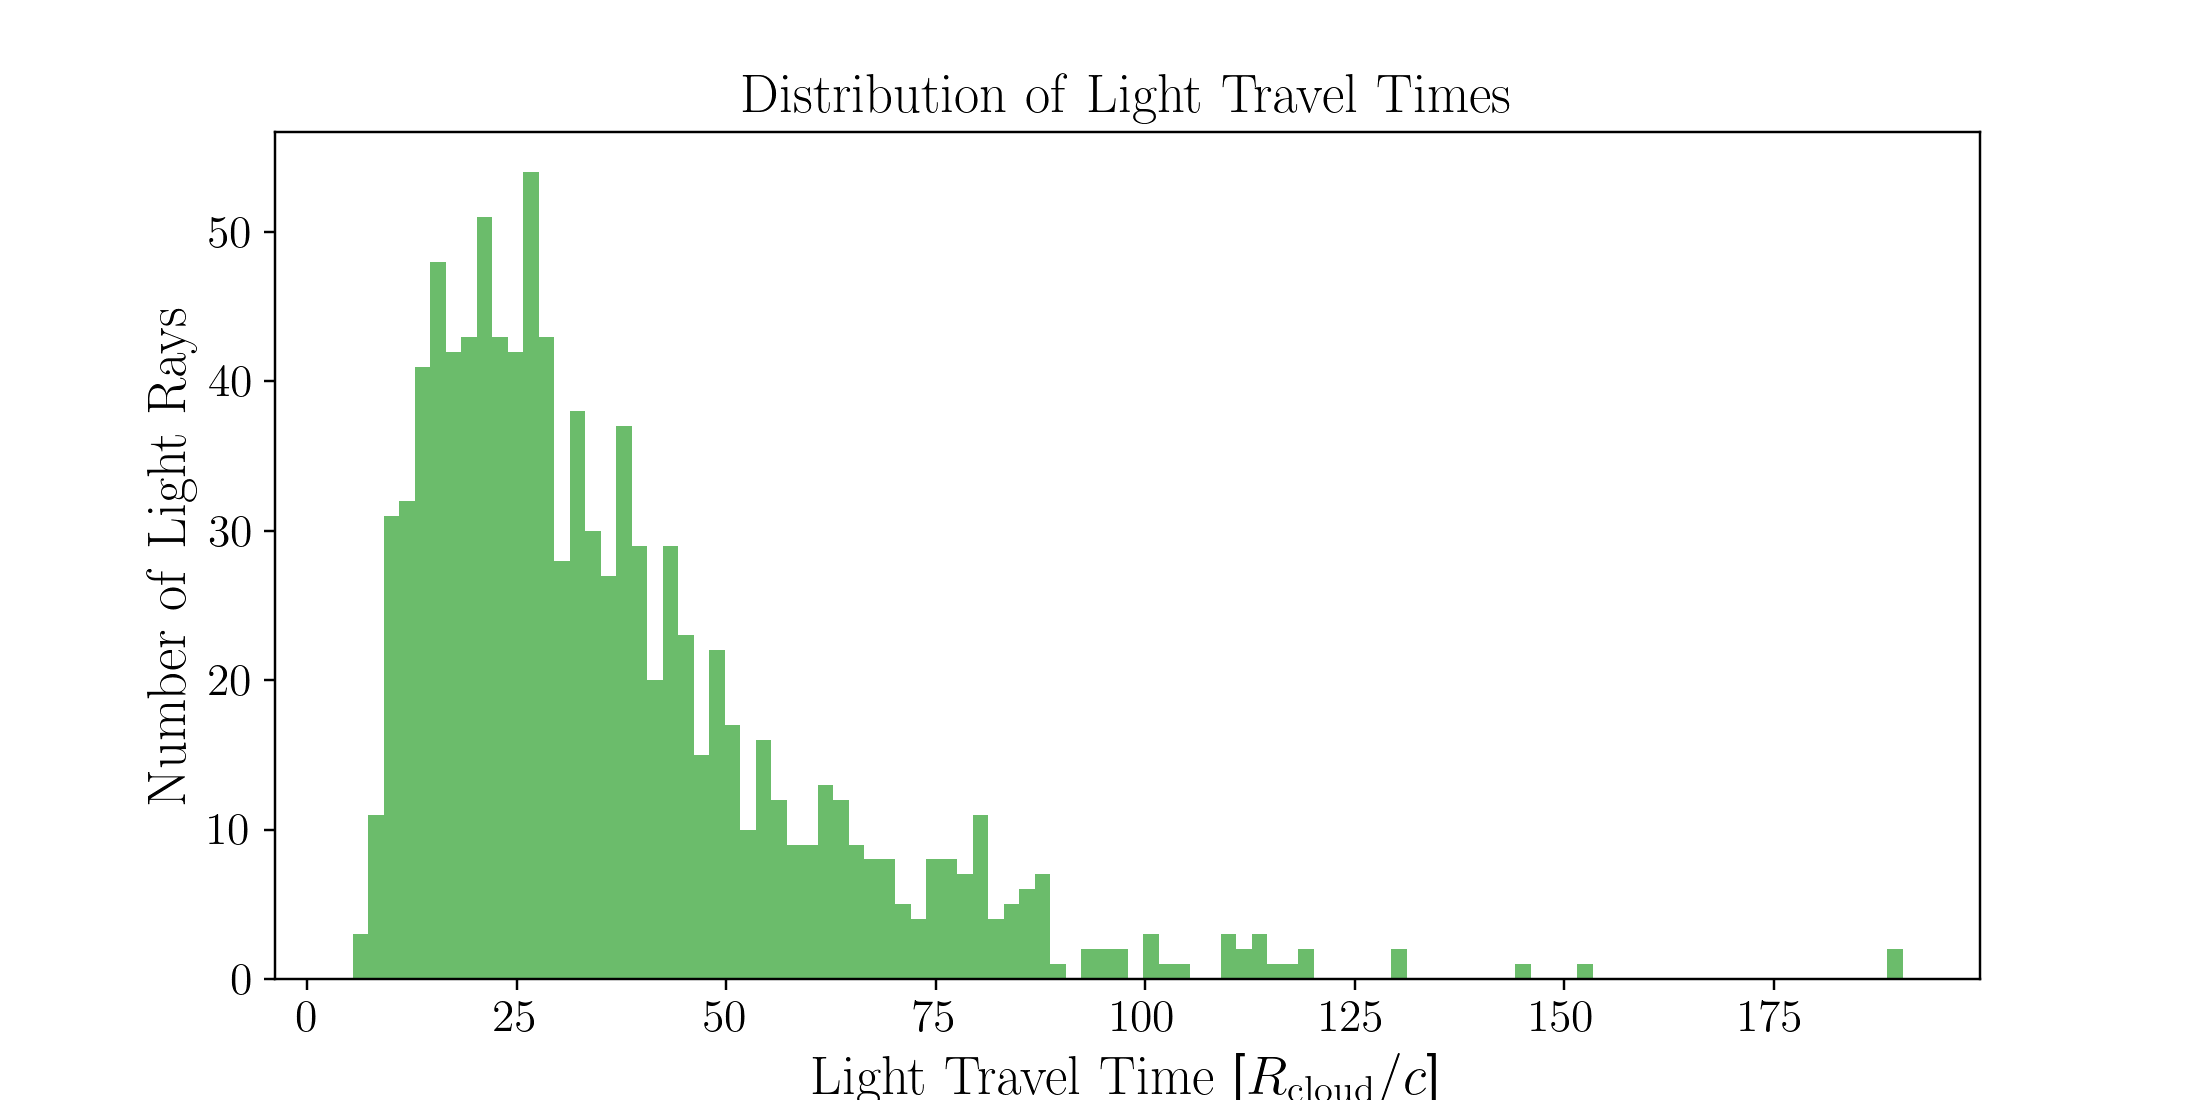

In [74]:
plt.figure(figsize=(10,5))
plt.hist(np.array(tpd)/1.5e11, bins=100, color='tab:blue', alpha=0.7)  # scale the total path distance by 1AU
plt.title(r'$\rm Distribution\,\,of\,\,Total\,\,Path\,\,Distances$', size=18)
plt.xlabel(r'$\rm Total\,\,Path\,\,Distance$ [$\rm AU$]', size=18)
plt.ylabel(r'$\rm Number\,\,of\,\,Light\,\,Rays$', size=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(np.array(ltt)/(Rcloud/c), bins=100, color='tab:green', alpha=0.7)  # scale the light travel time by half-light-crossing time of the cloud
plt.title(r'$\rm Distribution\,\,of\,\,Light\,\,Travel\,\,Times$', size=18)
plt.xlabel(r'$\rm Light\,\,Travel\,\,Time$ [$R_{\rm cloud}/c$]', size=18)
plt.ylabel(r'$\rm Number\,\,of\,\,Light\,\,Rays$', size=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Q3 discussion of total path distance and/or light travel times of non-uniform density
Total path distances is simply light travel time multiplied by speed of light.  The exponential trend decays less quicker, most scattering happens deep within the cloud, because when light rays diffuses outward, the density drops outward, so the rays would free stream sooner.

<IPython.core.display.Javascript object>


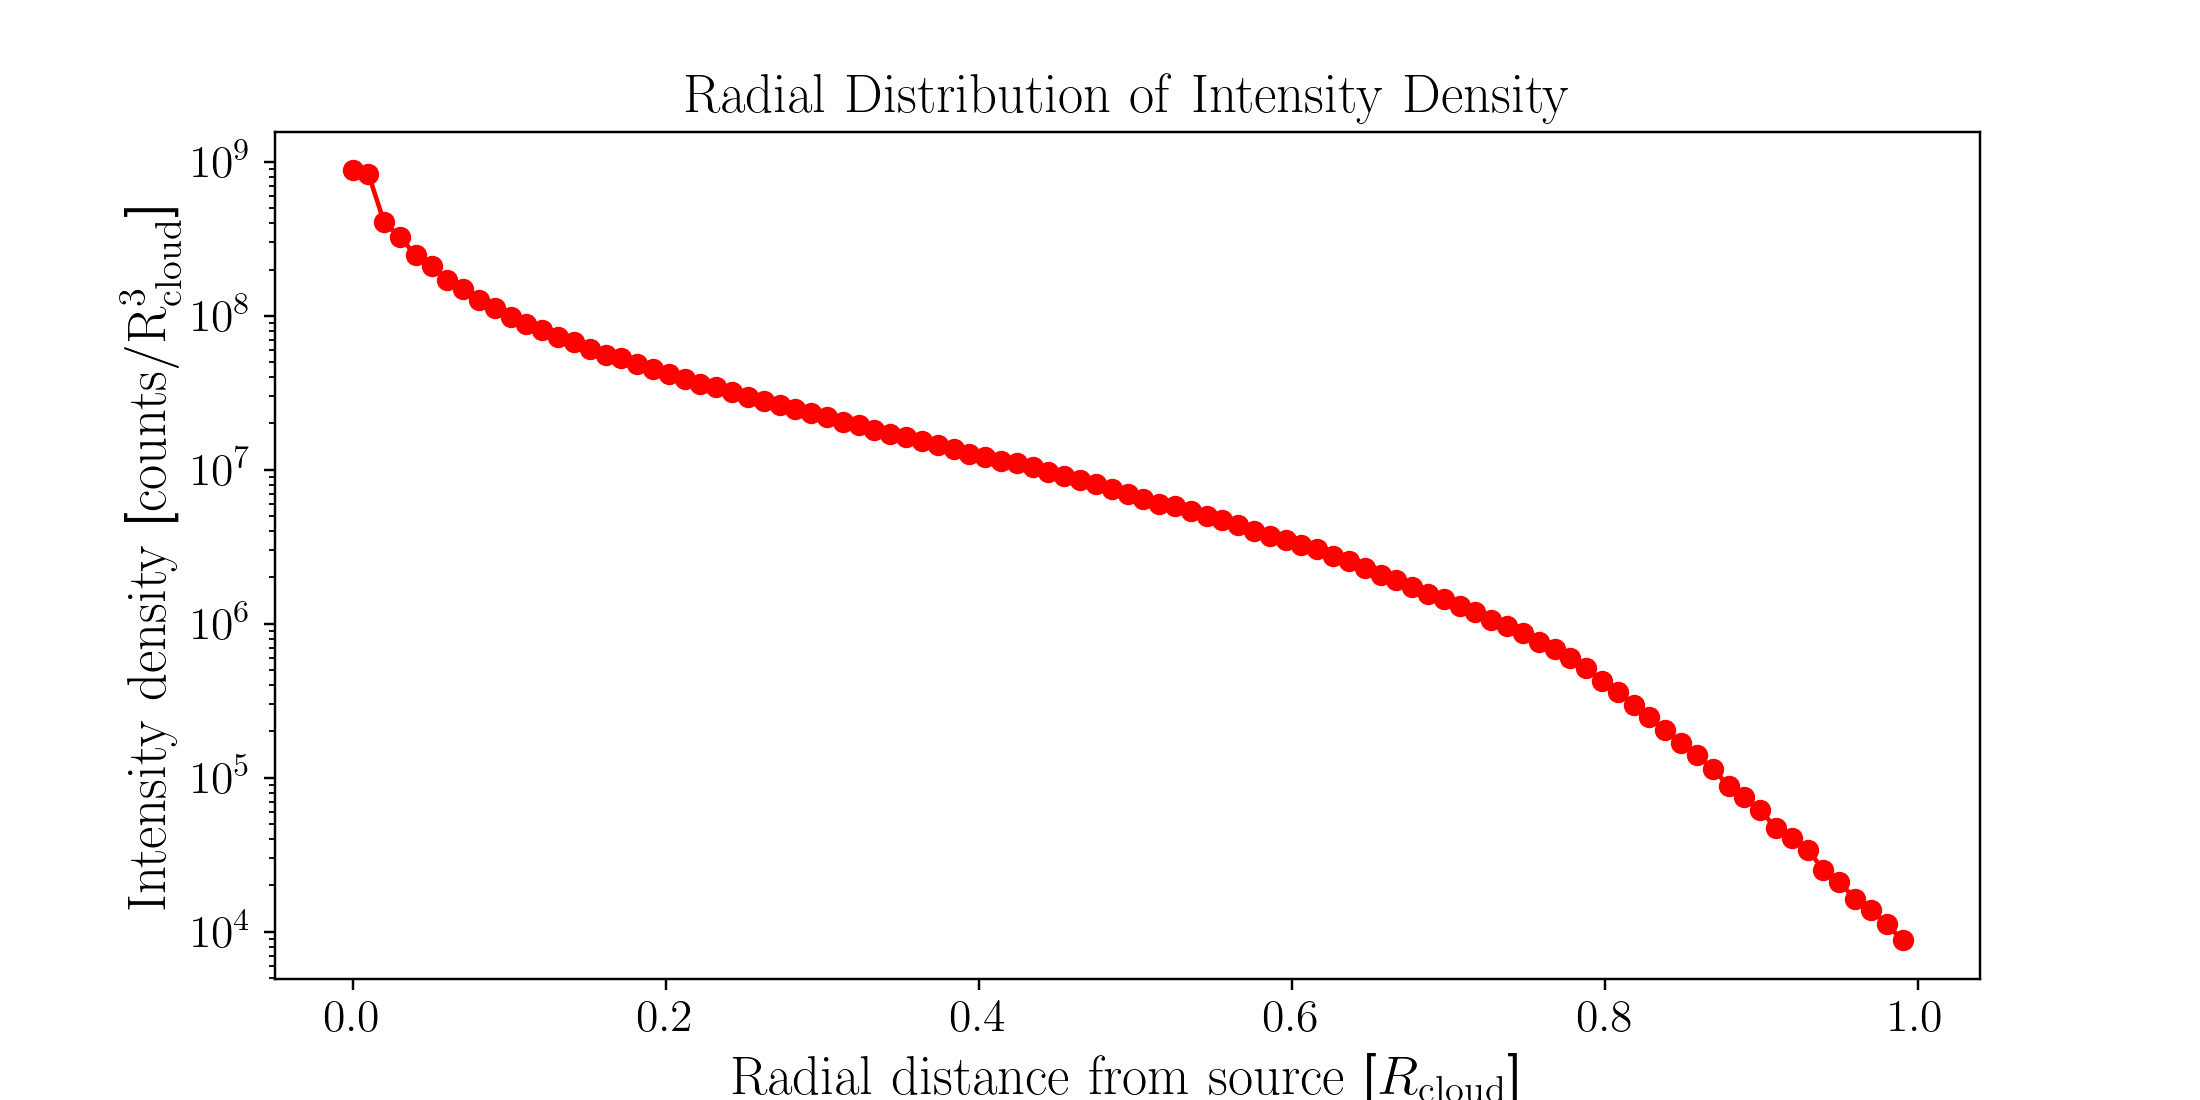

In [76]:
# Pick only one of the rays trajectory out
radial_bins = np.linspace(0,Rcloud,100)  # Number of radial shells & define the edges of the shells
radial_midpoints = (radial_bins[:-1] + radial_bins[1:])/2  # Calculate midpoints for plotting
counts, _ = np.histogram(np.array(rp), bins=radial_bins)  # (https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)
shells = (4/3)*np.pi*(radial_bins[1:]**3-radial_bins[:-1]**3)  # Calculate the volume of each shell by taking the difference between two consecutive volumes
#intensity_density = counts/shells
intensity_density = counts/(4*np.pi*(radial_midpoints/Rcloud)**2*(1/1000))  # scale radius by Rcloud because so I don't have to use sum up all rays and still get a sensible number 

plt.figure(figsize=(10,5))
#plt.plot(radial_midpoints/Rcloud, intensity_density/(Rcloud/1000), marker='o', linestyle='-', color='red')
plt.plot(radial_bins[:-1]/Rcloud, intensity_density, marker='o', linestyle='-', color='red')

plt.title(r'$\rm Radial\,\,Distribution\,\,of\,\,Intensity\,\,Density$', size=18)
plt.xlabel(r'$\rm Radial\,\,distance\,\,from\,\,source$ [$R_{\rm cloud}$]', size=18)
plt.ylabel(r'$\rm Intensity\,\,density$ [$\rm counts/R_{\rm cloud}^3$]', size=18)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Q3 discussion of radial distribution of intensity density of non-uniform density
The intensity density is higher at the center which makes sense (plot in log scale for better visualization) because the central density is higher and it drops off when moving out, so the mean free path is shorter at the center, so rays spend more time near the center.

<IPython.core.display.Javascript object>


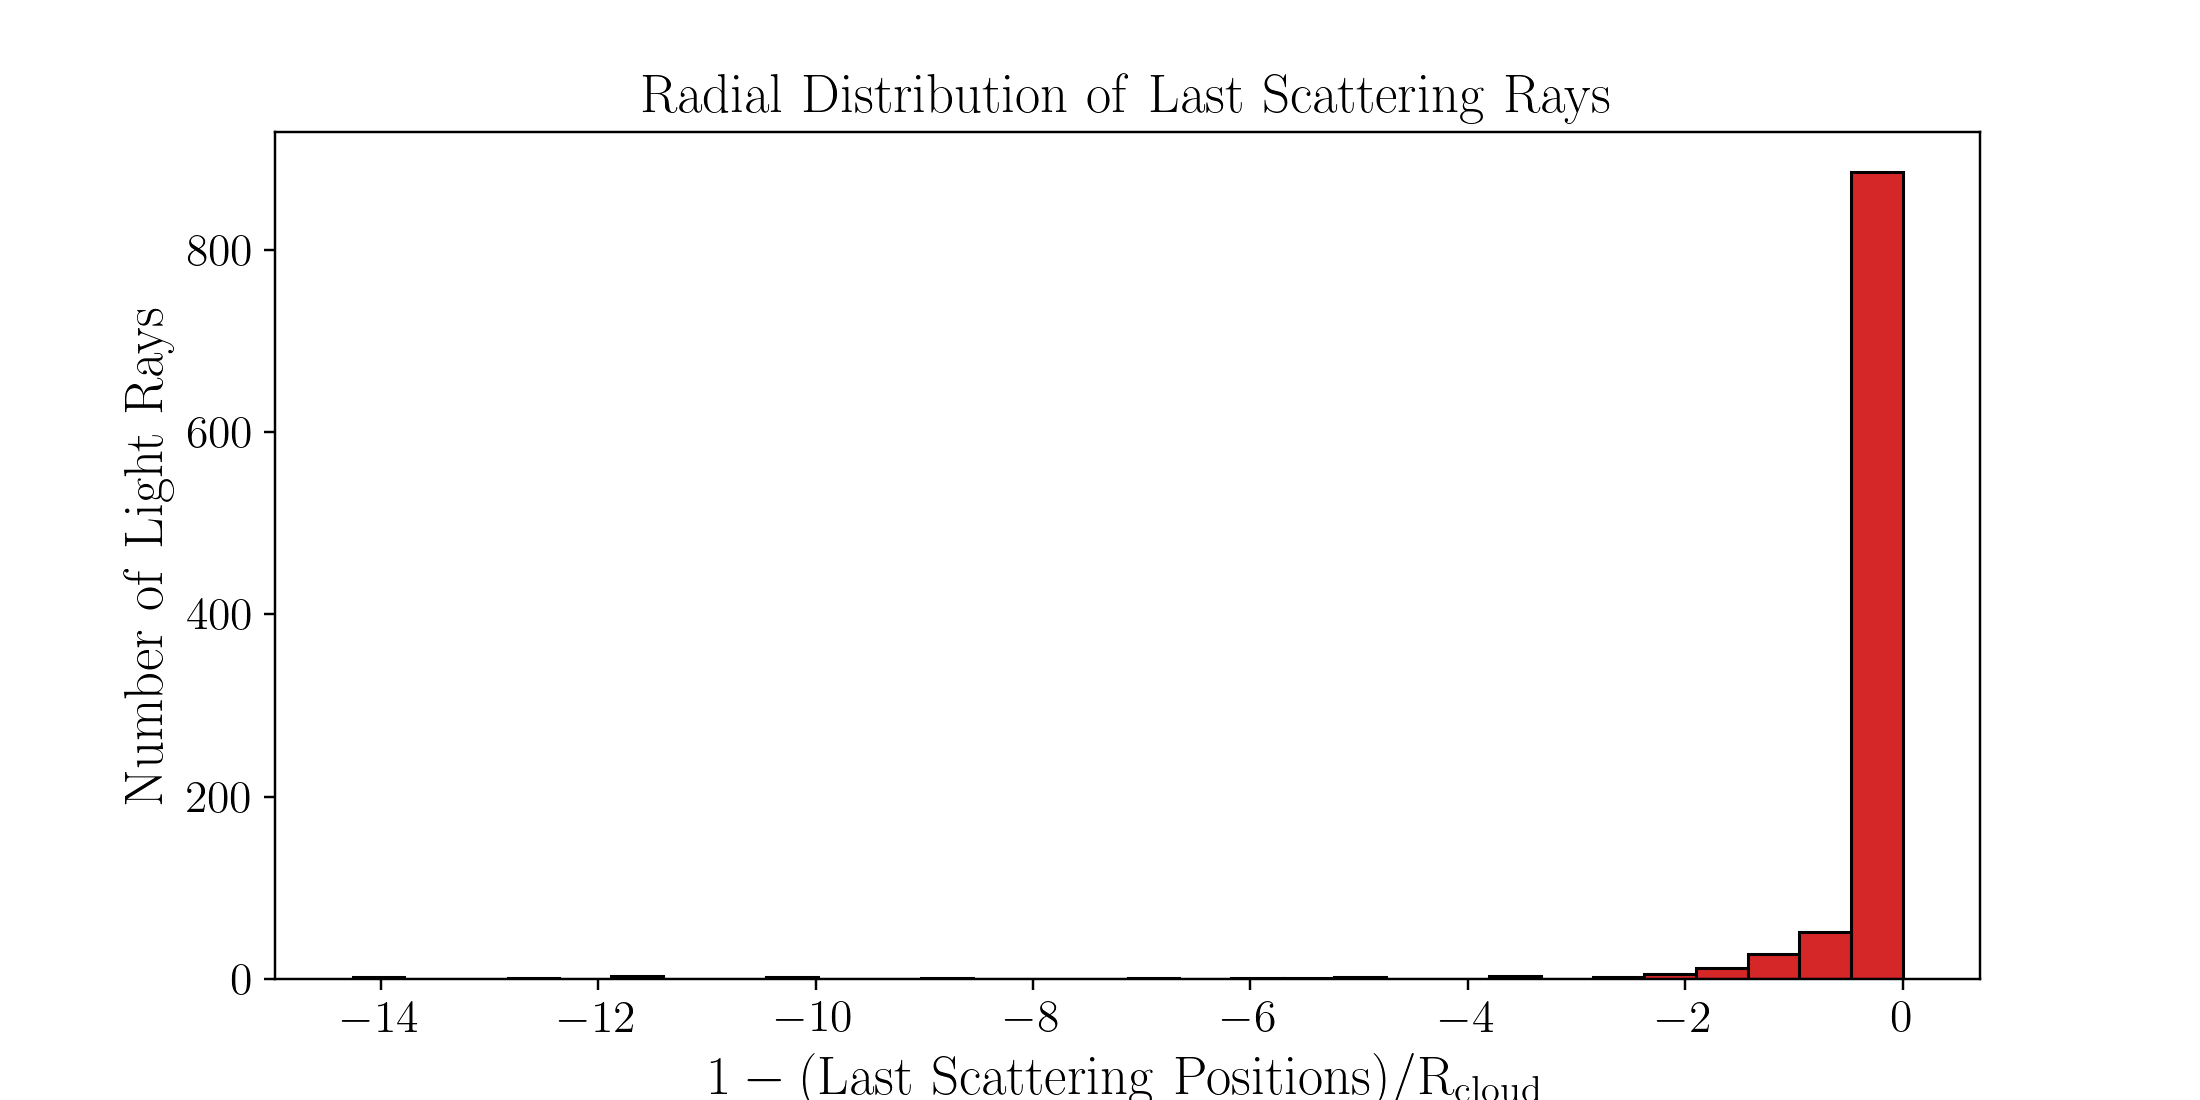

In [79]:
plt.figure(figsize=(10,5))
plt.hist((Rcloud-np.array(lsp))/Rcloud, bins=30, color='tab:red', edgecolor='black')  # rescaling the values to determine how close it is to the edge of the cloud
plt.title(r'$\rm Radial\,\,Distribution\,\,of\,\,Last\,\,Scattering\,\,Rays$', size=18)
plt.xlabel(r'$1-(\rm Last\,\,Scattering\,\,Positions)/R_{\rm cloud}$', size=18)
plt.ylabel(r'$\rm Number\,\,of\,\,Light\,\,Rays$', size=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Q3 discussion of radial distribution of last scattering position of non-uniform density
Almost all rays last scattering surface are at a certain radius, instead of spread out. The density drops significantly at a certain characteristic radius, and most rays can mostly free-stream.